## In this notebook, I will be analysing a given portfolio's value with time 

So before anything one might ask, what is the Monte Carlo Method?

In a nutshell, it is a computational technique used to estimate numerical results or solve complex problems through random sampling.

## Why Monte Carlo?

This is because in solving problems, we often rely on random variables that rely on sone kind of random distribution. Depending on the problem we are trying to sovle such as the random variables and their distribution, there may or may not be a deterministic solution.

However, in practice, as we start to introducing more complex random variables to our models with different underlying distributions. This becomes more difficult to work out mathemathical solutions. Therefore, in practice, we rely on Monte Carlo simulations - the number of samples taken and simulations run. This would lead to a convergence on an exact solution.

## First, let us import our needed libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

## Now we will import our data:

In [11]:
def getData(stocks, start, end):
    stockData = {}
    for stock in stocks:
        data = yf.download(stock, start=start, end=end)
        stockData[stock] = data['Close']

    returns = pd.DataFrame({stock: data.pct_change() for stock, data in stockData.items()})
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix #we will require our mean returns and our covariance matrix

stockList = ['AAPL', 'MSFT', 'NVDA', 'GOOGL']

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365)
meanReturns, covMatrix = getData(stockList, startDate, endDate)
print(getData(stockList, start=startDate, end=endDate))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
(AAPL     0.001091
MSFT     0.001517
NVDA     0.005900
GOOGL    0.001556
dtype: float64,            AAPL      MSFT      NVDA     GOOGL
AAPL   0.000292  0.000217  0.000320  0.000235
MSFT   0.000217  0.000361  0.000407  0.000284
NVDA   0.000320  0.000407  0.001166  0.000352
GOOGL  0.000235  0.000284  0.000352  0.000453)


Once we got our data, we would now place weights in our portfolio. I'll do this randomly.


In [12]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights) #This would sum equally to 1 by normalizing

print(weights)

[0.07861551 0.56462316 0.04411541 0.31264593]


## Here is some Mathemathical Intuition behind the Monte Carlo Code:

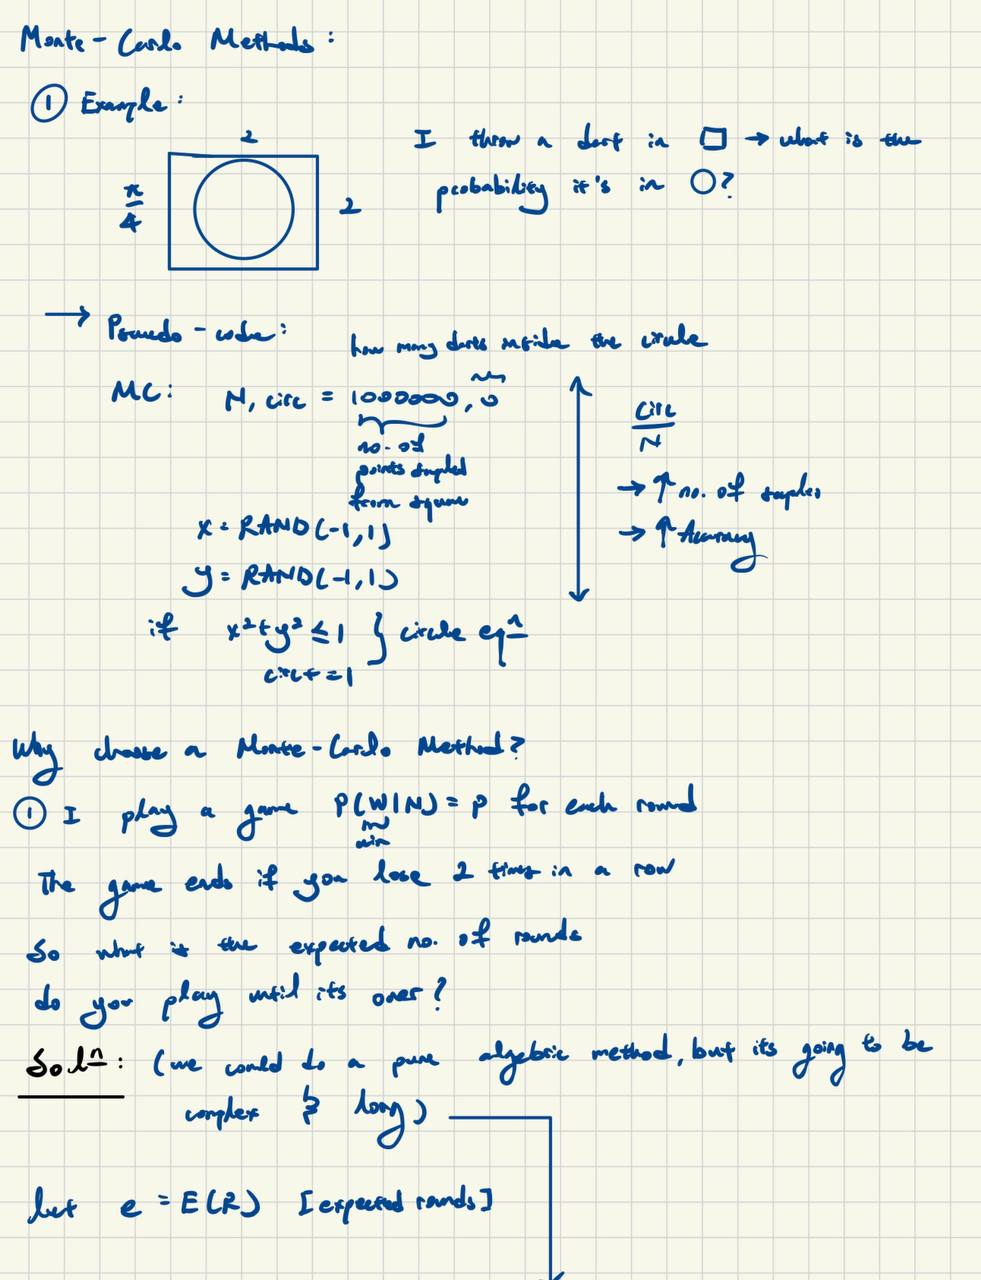

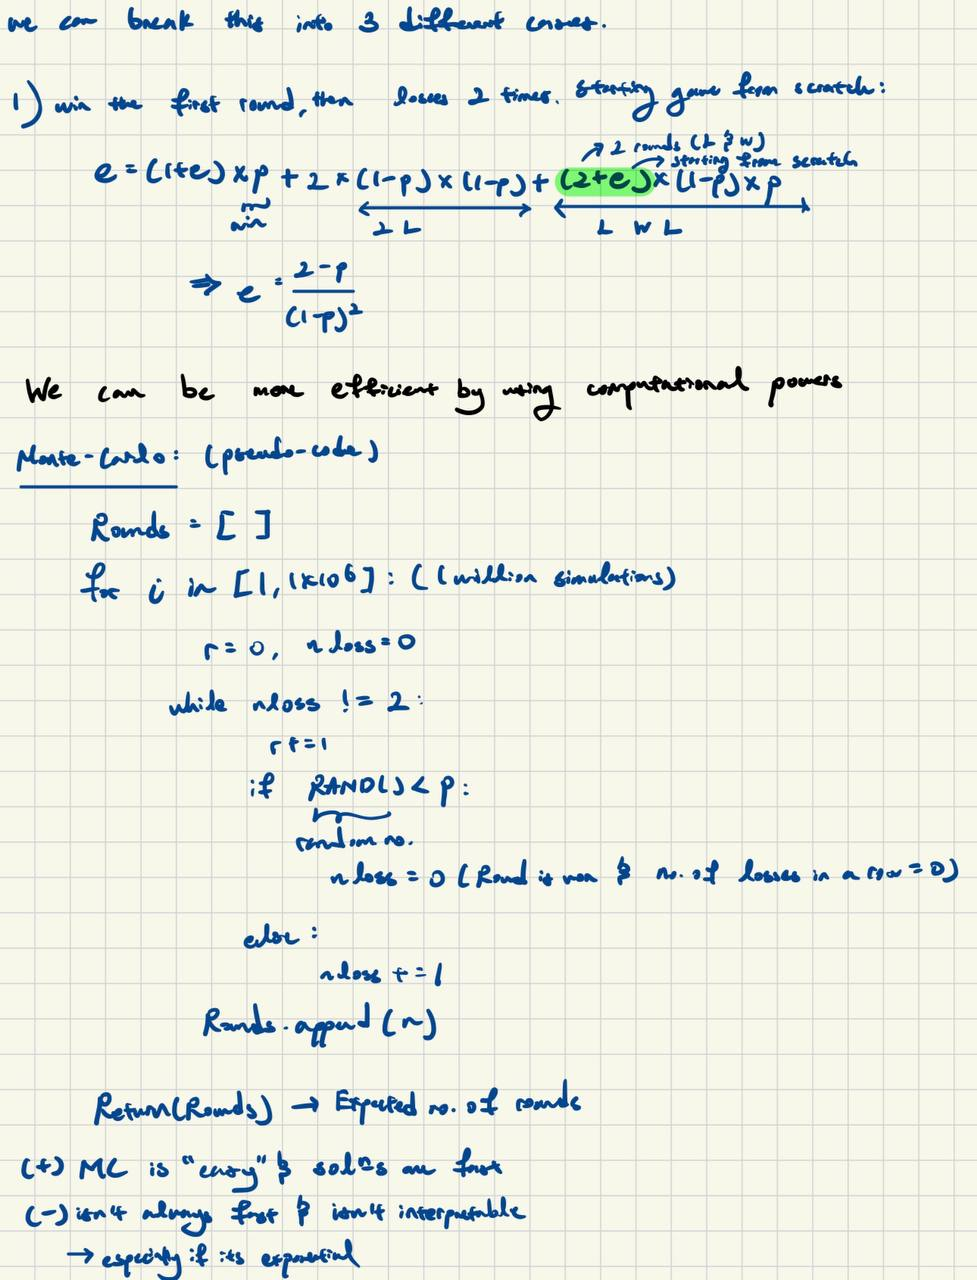

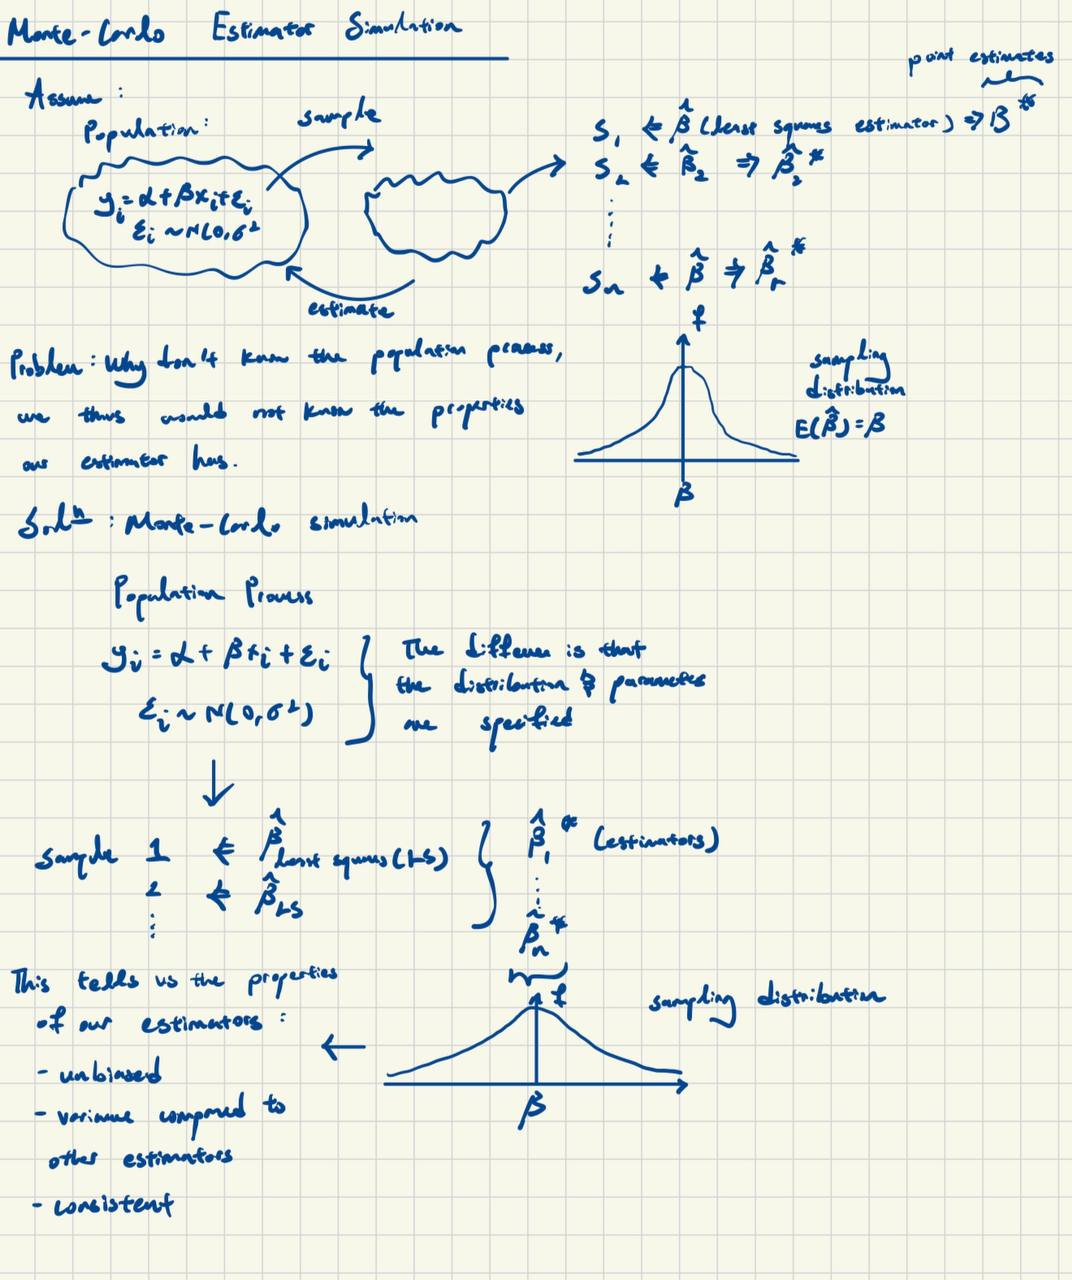

## For more information about such concepts:

it can be found here in my time series notes: [insert link here]
    
or here in my quantitative finance notes: [insert link here]

## Let us jump to into our Monte Carlo Method:

Note: 
In our case, we would assume daily returns are distributed by a MultiVariate Normal Distribition. 

We would also use Cholesky Decomposition to determine Lower Triangular Matrix 

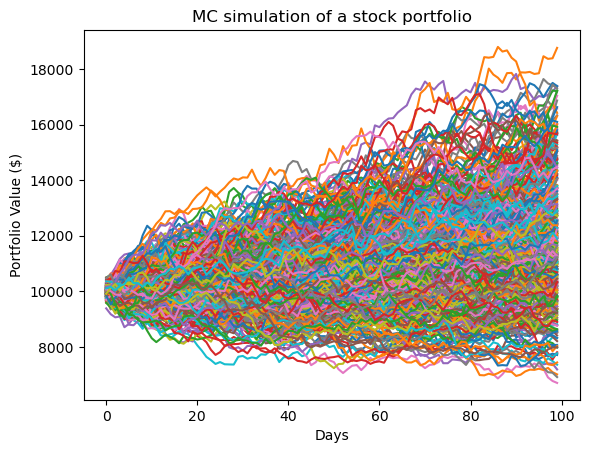

In [16]:
# Monte Carlo Method
mc_sims = 400 # number of simulations
T = 100 #timeframe in days 

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns) #our mean matrix by taking on the shape of our weights
meanM = meanM.T 

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
# T by no. of stocks we have that are uncorrelated random variables from the normal distribution
initialPortfolio = 10000

for m in range(0, mc_sims):
#our Monte Carlo Loops
    Z = np.random.normal(size=(T, len(weights))) # uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) 
# Cholesky decomposition to Lower Triangular Matrix which represents the covariance matrix
    dailyReturns = meanM + np.inner(L, Z) 
# Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

## Let me give a run through of what I have just done:

Essentially, this code performs a Monte Carlo simulation to estimate the range of possible outcomes for your stock portfolio's value over a specified timeframe, considering the correlations and volatilities among the assets in the portfolio. This can be useful for risk assessment and decision-making in investment scenarios.

Simulation Parameters - I've defined the following parameters for my Monte Carlo simulation:

mc_sims: The number of simulation runs or scenarios.
T: The timeframe in days for which I want to simulate the portfolio's performance.
Mean and Covariance Matrix: Created a mean matrix meanM with dimensions (T, number_of_assets) filled with mean returns. This matrix represents the expected returns of individual assets in the portfolio over time. There is also a covariance matrix covMatrix that characterizes the relationships (correlations and volatilities) between these assets.

Portfolio Simulations: Created an empty matrix portfolio_sims with dimensions (T, mc_sims) to store the simulated portfolio values over time for each simulation run.

Initial Portfolio Value: Set an initial portfolio value of $10,000.

Monte Carlo Loop: Loop through each Monte Carlo simulation (m from 0 to mc_sims-1), and for each simulation:

Generate random numbers from a standard normal distribution (np.random.normal) to create Z, a matrix of uncorrelated random variables with dimensions (T, number_of_assets).

Perform Cholesky decomposition (np.linalg.cholesky) on the covariance matrix covMatrix to get the lower triangular matrix L. This decomposition allows you to generate correlated random variables that follow the desired covariance structure.
Calculate daily returns (dailyReturns) for each asset by combining the mean returns and the product of L and Z. These daily returns represent the asset's price changes over time.

Calculate the portfolio's daily returns by taking the inner product of the asset weights and the transposed dailyReturns, adding 1 to each return, and then using np.cumprod to cumulatively multiply these daily returns over time.
Store the simulated portfolio values for this run in the portfolio_sims matrix.

Plotting: Finally, plot the simulated portfolio values over the specified timeframe for all simulation runs. This provides you with a visual representation of how the portfolio's value could evolve over time under different scenarios.

Code inspired by quantpy